In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings(action='ignore')

In [153]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('data2.pkl')

## 1. 모든 컬럼을 고려한 모델 평가

In [154]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
dumm_cols = ['weekday', 'season']

data = pd.get_dummies(data, columns = dumm_cols, drop_first=True, dtype = int)

data.head()

,date,drive,call_num,ride_num,waiting_time,fee,dis,day,month,year,...,ride_num/call_num,weekday_목,weekday_수,weekday_월,weekday_일,weekday_토,weekday_화,season_Summer,season_Fall,season_Winter
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,...,90.322581,1,0,0,0,0,0,0,0,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,2,1,2015,...,89.898670,0,0,0,0,0,0,0,0,1
2,2015-01-03,209,1648,1514,26.2,2377,10198,3,1,2015,...,91.868932,0,0,0,0,1,0,0,0,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,4,1,2015,...,92.709599,0,0,0,1,0,0,0,0,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,5,1,2015,...,87.764706,0,0,1,0,0,0,0,0,1


In [155]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
target = 'waiting_time'
test_date = data.loc[data['date'] >= '2022-10-01']['date']
x = data.drop([target,'date'], axis = 1)
y = data[target]

In [158]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 92, shuffle = False)

In [159]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [160]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### 1-1. Linear Regression

In [161]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.linear_model import LinearRegression

model_li = LinearRegression()
model_li.fit(x_train, y_train)

LinearRegression()

In [162]:
y_pred = model_li.predict(x_test)

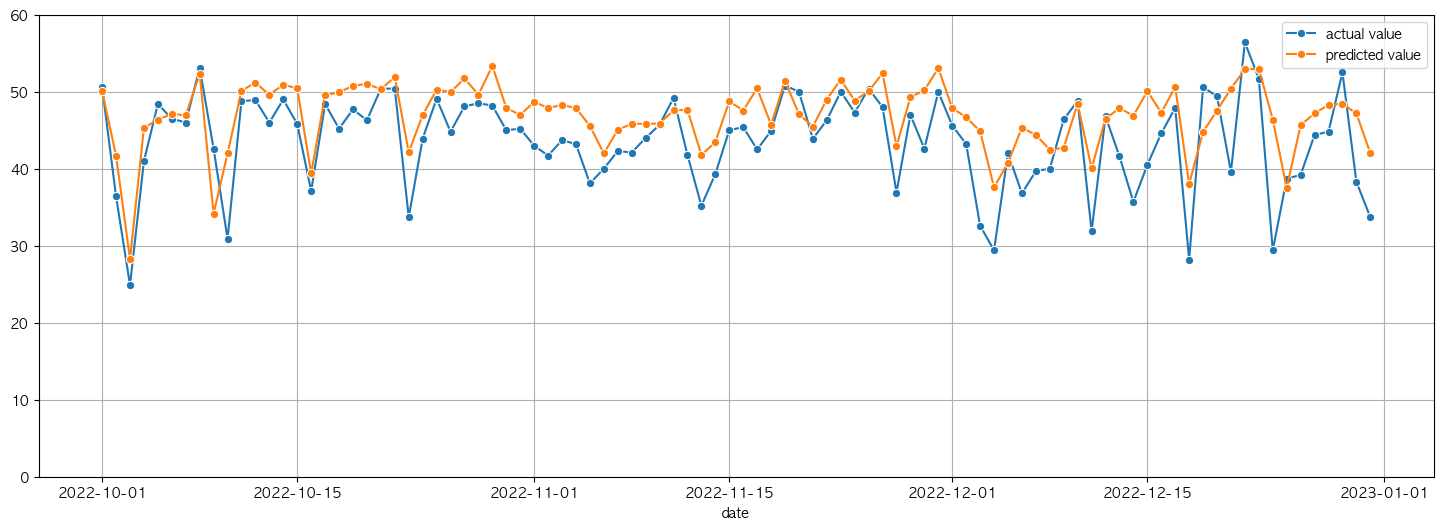

In [163]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [164]:
result = {}
result['선형회귀 mae'] = mean_absolute_error(y_test, y_pred)
result['선형회귀 mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['선형회귀 r2'] = r2_score(y_test, y_pred)

### 1-2. KNN

In [165]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(x_train_s, y_train)

KNeighborsRegressor()

In [166]:
y_pred = model.predict(x_test_s)

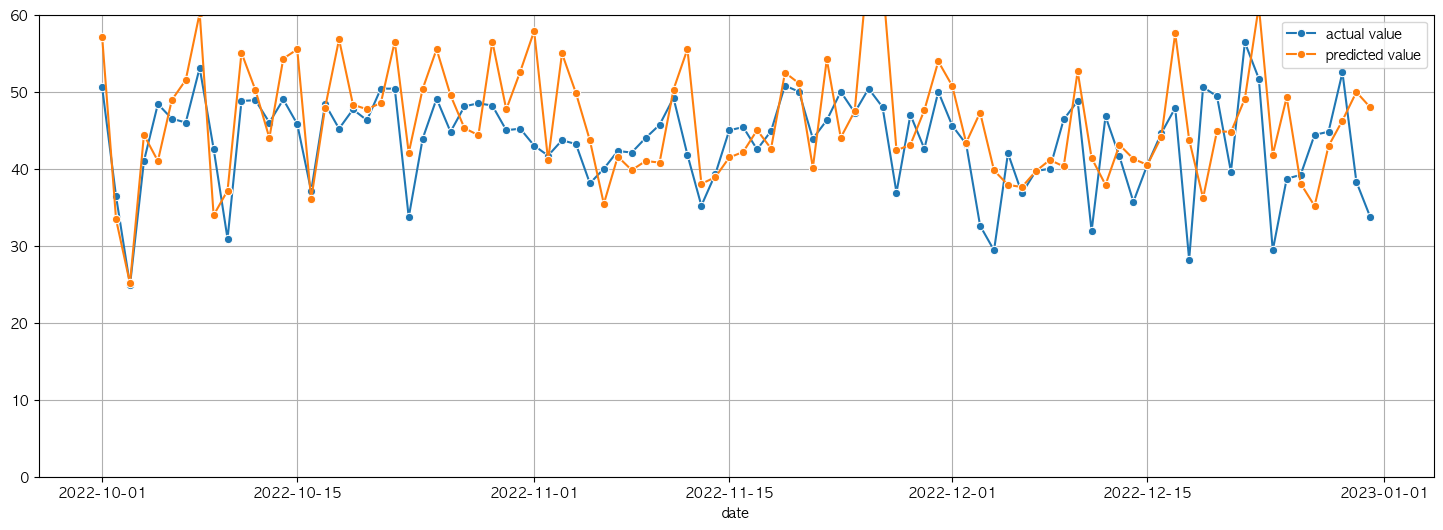

In [167]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [168]:
result['KNN mae'] = mean_absolute_error(y_test, y_pred)
result['KNN mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['KNN r2'] = r2_score(y_test, y_pred)

### 1-3. Decision Tree

In [169]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [170]:
y_pred = model.predict(x_test)

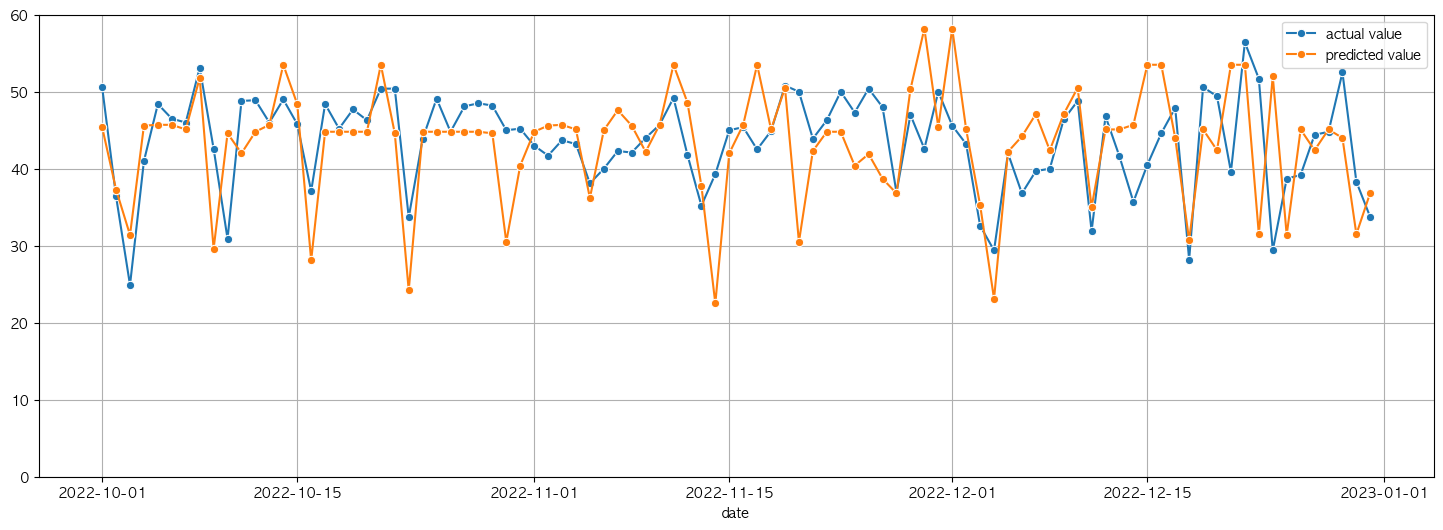

In [171]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [172]:
result['Decision Tree mae'] = mean_absolute_error(y_test, y_pred)
result['Decision Tree mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['Decision Tree r2'] = r2_score(y_test, y_pred)

### 1-4. Random Forest

In [173]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [174]:
y_pred = model.predict(x_test)

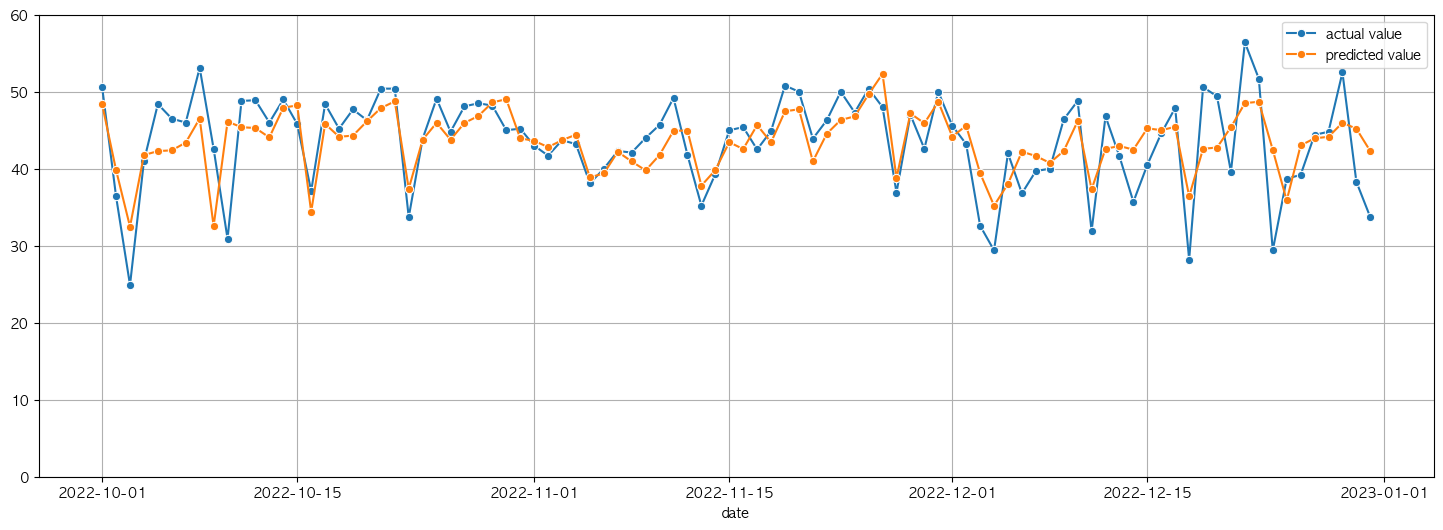

In [175]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [176]:
result['Random Forest mae'] = mean_absolute_error(y_test, y_pred)
result['Random Forest mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['Random Forest r2'] = r2_score(y_test, y_pred)

### 1-5. XGBoost

In [177]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [178]:
y_pred = model.predict(x_test)

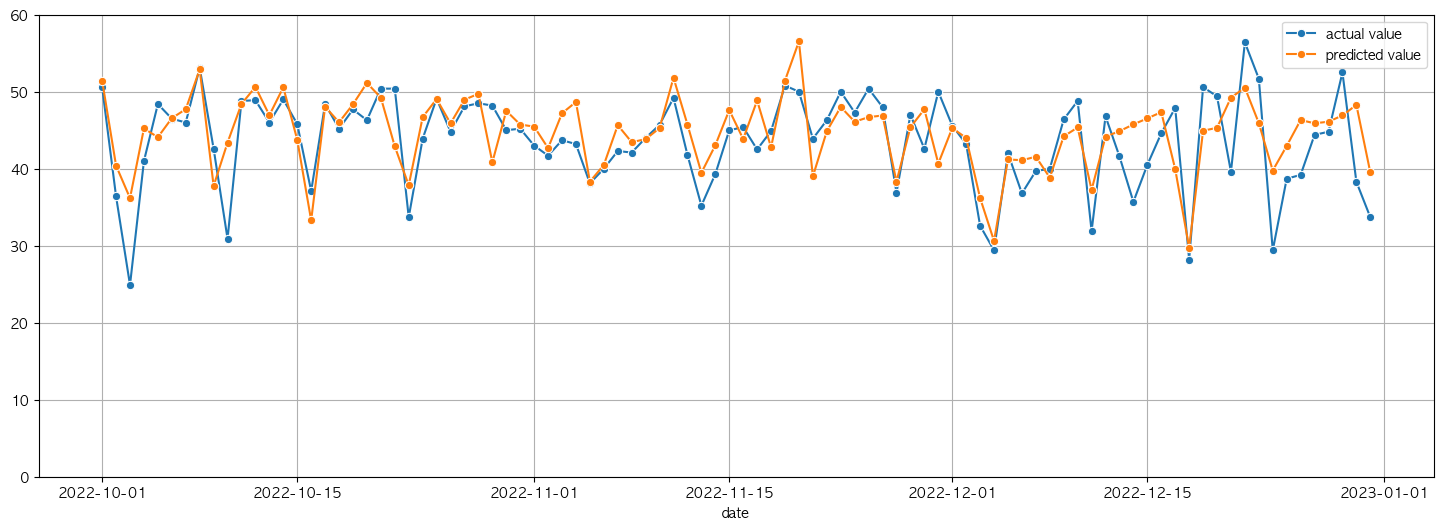

In [179]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [180]:
result['XGB mae'] = mean_absolute_error(y_test, y_pred)
result['XGB mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['XGB r2'] = r2_score(y_test, y_pred)

### 1-6. LightGBM

In [181]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(max_depth=5, random_state=1, verbose=-1)
model.fit(x_train, y_train)

LGBMRegressor(max_depth=5, random_state=1, verbose=-1)

In [182]:
y_pred = model.predict(x_test)

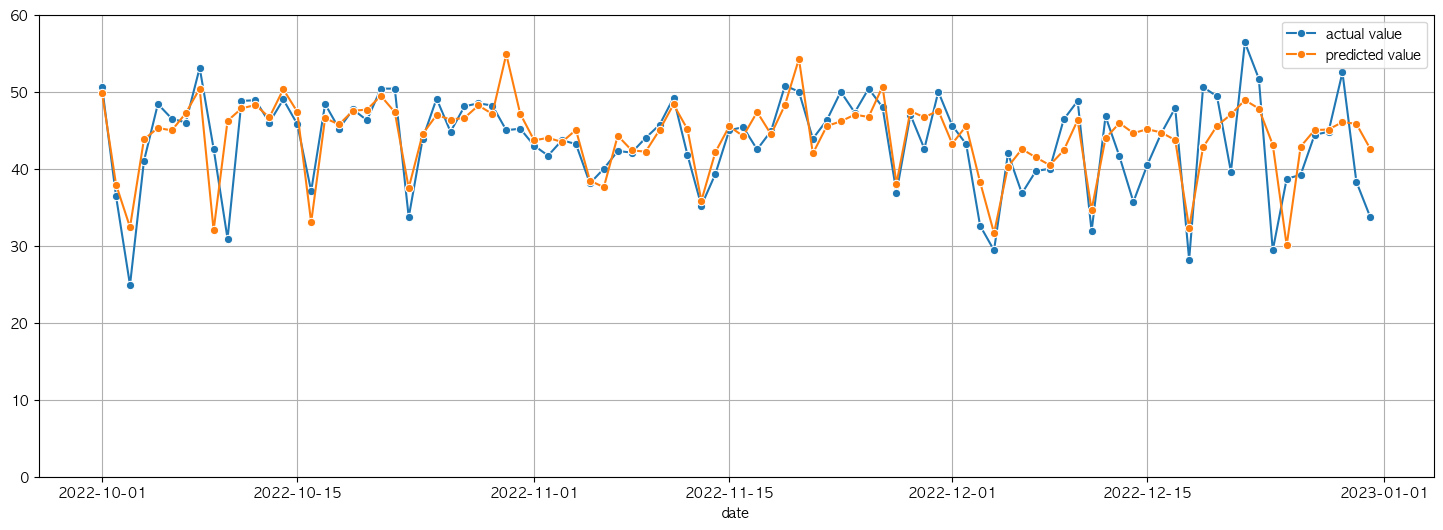

In [183]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [184]:
result['LGBM mae'] = mean_absolute_error(y_test, y_pred)
result['LGBM mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['LGBM r2'] = r2_score(y_test, y_pred)

### 1-7. SVR

In [185]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

SVR()

In [186]:
y_pred = model.predict(x_test)

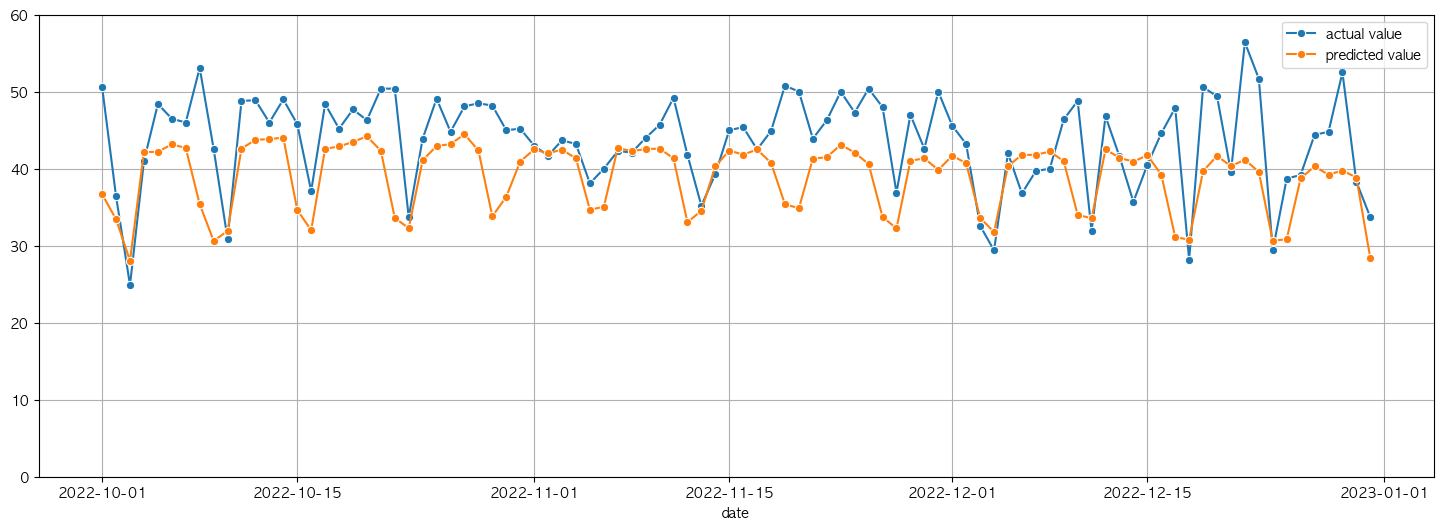

In [187]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [188]:
result['SVR mae'] = mean_absolute_error(y_test, y_pred)
result['SVR mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['SVR r2'] = r2_score(y_test, y_pred)

### 1-8. 각 모델별 성능

In [189]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

선형회귀 mae 4.14
선형회귀 mape 0.106
선형회귀 r2 0.264
KNN mae 5.561
KNN mape 0.133
KNN r2 -0.328
Decision Tree mae 5.253
Decision Tree mape 0.127
Decision Tree r2 -0.369
Random Forest mae 3.318
Random Forest mape 0.083
Random Forest r2 0.496
XGB mae 3.383
XGB mape 0.084
XGB r2 0.474
LGBM mae 3.08
LGBM mape 0.077
LGBM r2 0.507
SVR mae 5.355
SVR mape 0.117
SVR r2 -0.337


모든 컬럼을 고려하여 모델 평가를 수행한 결과 LGBM이 가장 좋은 평가를 내린다는 것을 알 수 있었다.

이번에는 이전 전처리 결과를 고려하여 상관계수가 연관이 있다고 판단되는 컬럼들을 위주로 모델을 구성하고 평가해보았다. 

더불어 도메인 지식을 조사한 결과 택시 이용은 비가 오는 날씨와 폭염일 경우에 영향을 주고 받는 다는 것을 알 수 있었다. 이를 고려하여 비의 양을 3mm를 기준으로 폭염의 경우 33도를 기준으로 나누어 각각 'rain'과 'heat'라는 새로운 컬럼을 제작해보았다.

# 2. 상관계수를 고려한 컬럼 선정 후 모델 평가

In [190]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('data2.pkl')

In [191]:
data.loc[data['rain(mm)'] > 3, 'rain'] = 1
data.loc[data['rain(mm)'] <= 3, 'rain'] = 0

In [192]:
data.loc[data['temp_max'] >= 33, 'heat'] = 1
data.loc[data['temp_max'] < 33, 'heat'] = 0

In [193]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
dumm_cols = ['weekday', 'season']

data = pd.get_dummies(data, columns = dumm_cols, drop_first=True, dtype = int)

data.head()

,date,drive,call_num,ride_num,waiting_time,fee,dis,day,month,year,...,heat,weekday_목,weekday_수,weekday_월,weekday_일,weekday_토,weekday_화,season_Summer,season_Fall,season_Winter
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,...,0.0,1,0,0,0,0,0,0,0,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,2,1,2015,...,0.0,0,0,0,0,0,0,0,0,1
2,2015-01-03,209,1648,1514,26.2,2377,10198,3,1,2015,...,0.0,0,0,0,0,1,0,0,0,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,4,1,2015,...,0.0,0,0,0,1,0,0,0,0,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,5,1,2015,...,0.0,0,0,1,0,0,0,0,0,1


In [194]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
target = 'waiting_time'
test_date = data.loc[data['date'] >= '2022-10-01']['date']
x = data.drop([target, 'fee', 'dis', 'date', 'day', 'temp_max', 'temp_min', 'rain(mm)', 
               'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)'], axis = 1)
y = data[target]

In [195]:
x.head(10)

,drive,call_num,ride_num,month,year,holiday,7_day_avg_waiting_time,ride_num/call_num,rain,heat,weekday_목,weekday_수,weekday_월,weekday_일,weekday_토,weekday_화,season_Summer,season_Fall,season_Winter
0,213,1023,924,1,2015,1.0,0.000000,90.322581,0.0,0.0,1,0,0,0,0,0,0,0,1
1,420,3158,2839,1,2015,0.0,0.000000,89.898670,0.0,0.0,0,0,0,0,0,0,0,0,1
2,209,1648,1514,1,2015,0.0,0.000000,91.868932,0.0,0.0,0,0,0,0,1,0,0,0,1
3,196,1646,1526,1,2015,0.0,0.000000,92.709599,0.0,0.0,0,0,0,1,0,0,0,0,1
4,421,4250,3730,1,2015,0.0,0.000000,87.764706,1.0,0.0,0,0,1,0,0,0,0,0,1
5,417,3991,3633,1,2015,0.0,0.000000,91.029817,0.0,0.0,0,0,0,0,0,1,0,0,1
6,410,4085,3676,1,2015,0.0,23.657143,89.987760,0.0,0.0,0,1,0,0,0,0,0,0,1
7,419,4030,3728,1,2015,0.0,23.371429,92.506203,0.0,0.0,1,0,0,0,0,0,0,0,1
8,424,4167,3813,1,2015,0.0,24.028571,91.504680,0.0,0.0,0,0,0,0,0,0,0,0,1
9,215,1916,1645,1,2015,0.0,26.171429,85.855950,0.0,0.0,0,0,0,0,1,0,0,0,1


In [196]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 92, shuffle = False)

In [197]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [198]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### 2-1. Linear Regression

In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.linear_model import LinearRegression

model_li = LinearRegression()
model_li.fit(x_train, y_train)

LinearRegression()

In [90]:
y_pred = model_li.predict(x_test)

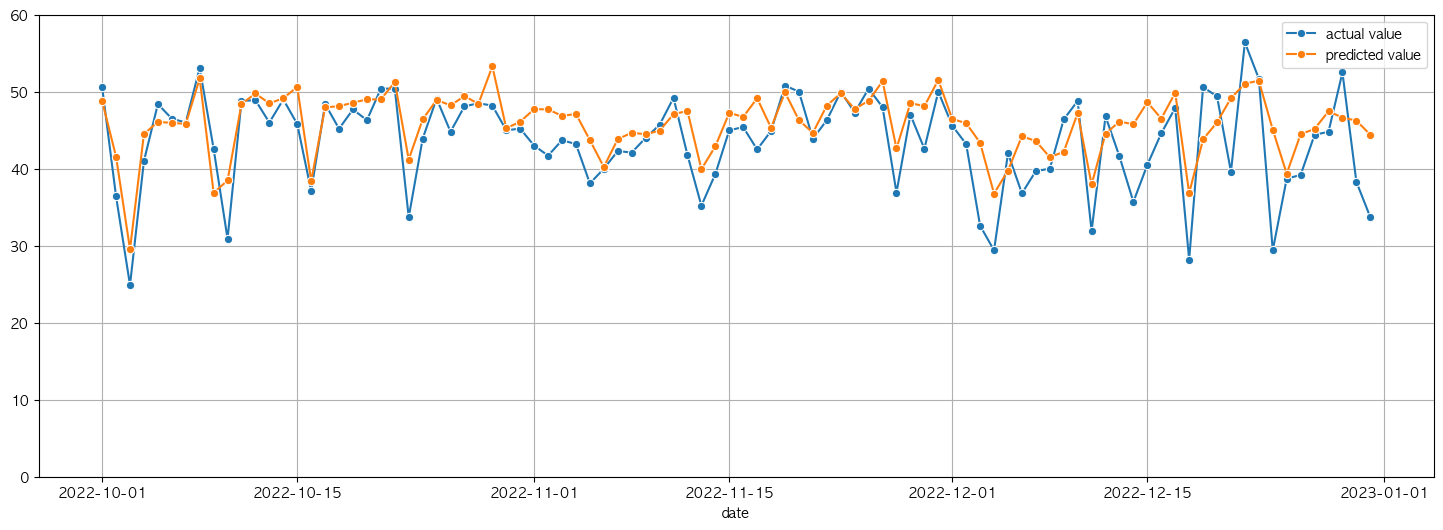

In [91]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [92]:
result = {}
result['선형회귀 mae'] = mean_absolute_error(y_test, y_pred)
result['선형회귀 mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['선형회귀 r2'] = r2_score(y_test, y_pred)

### 2-2. KNN

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(x_train_s, y_train)

KNeighborsRegressor()

In [94]:
y_pred = model.predict(x_test_s)

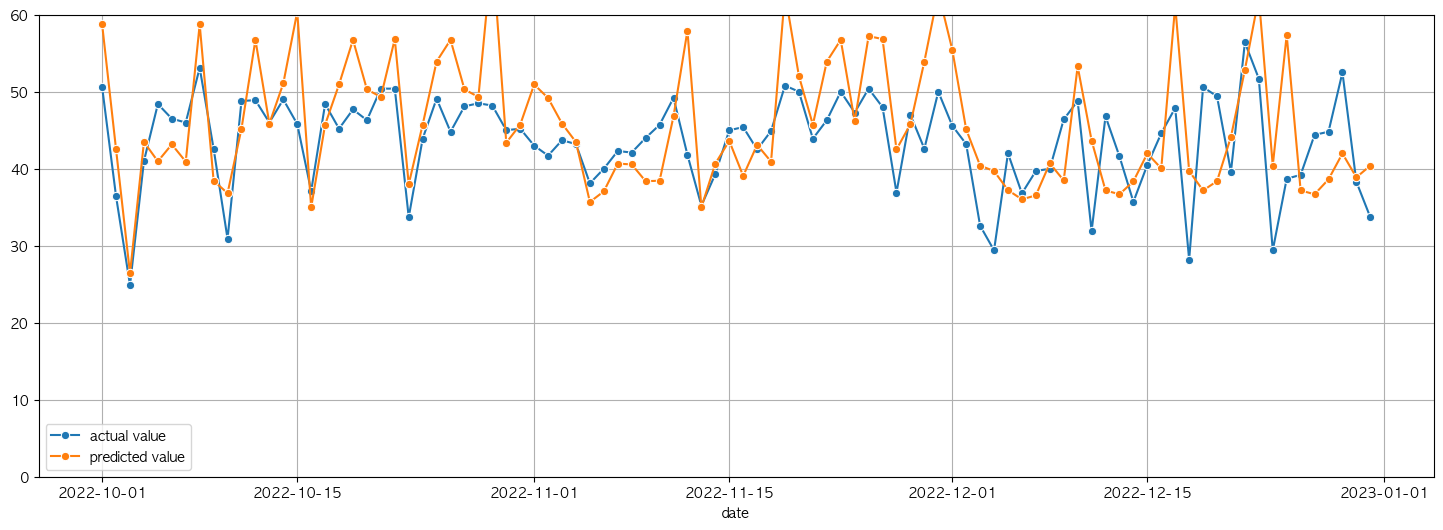

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [96]:
result['KNN mae'] = mean_absolute_error(y_test, y_pred)
result['KNN mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['KNN r2'] = r2_score(y_test, y_pred)

### 2-3. Decision Tree

In [97]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [98]:
y_pred = model.predict(x_test)

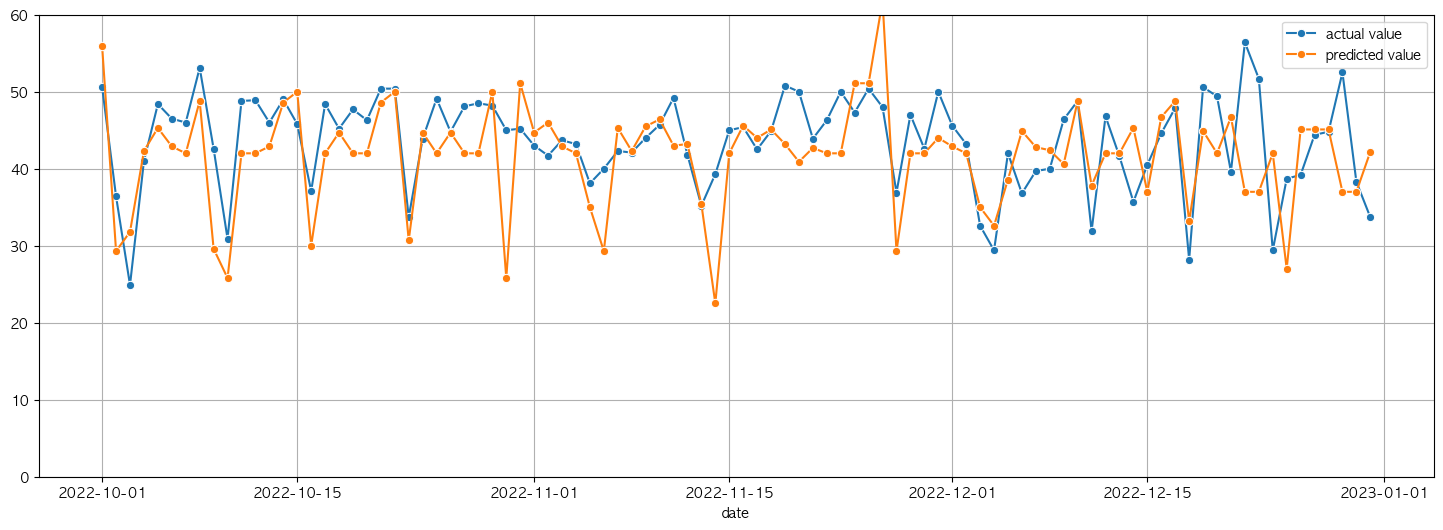

In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [100]:
result['Decision Tree mae'] = mean_absolute_error(y_test, y_pred)
result['Decision Tree mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['Decision Tree r2'] = r2_score(y_test, y_pred)

### 2-4. Random Forest

In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [102]:
y_pred = model.predict(x_test)

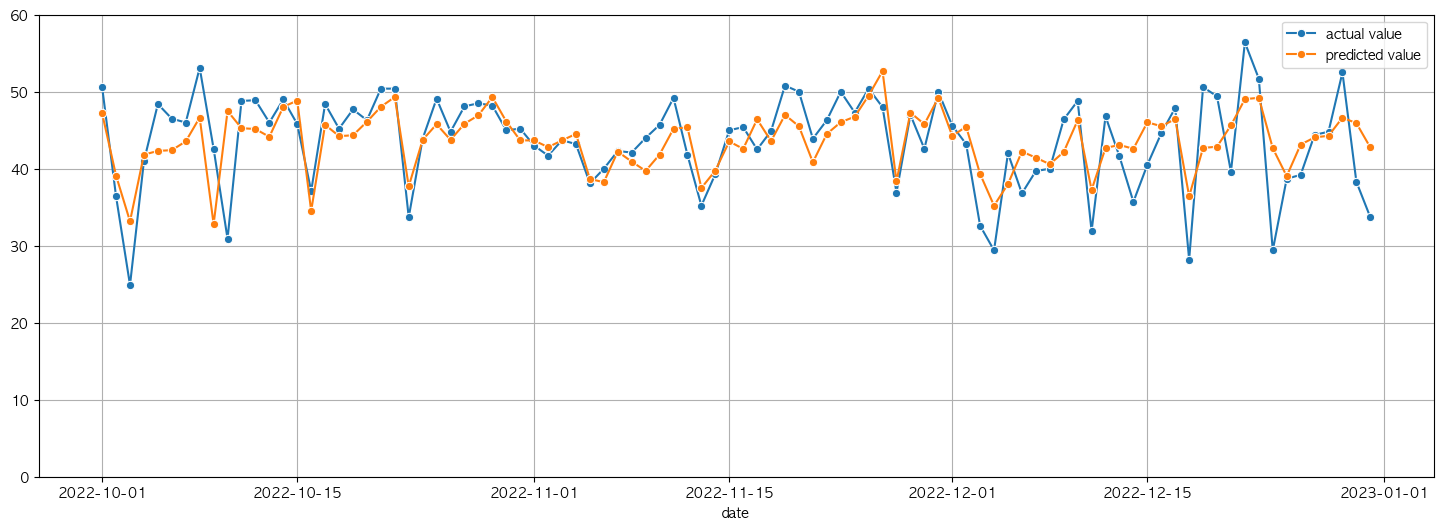

In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
pred_plot(y_test, y_pred, test_date)

In [104]:
result['Random Forest mae'] = mean_absolute_error(y_test, y_pred)
result['Random Forest mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['Random Forest r2'] = r2_score(y_test, y_pred)

### 2-5. XGBoost

In [105]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [106]:
y_pred = model.predict(x_test)

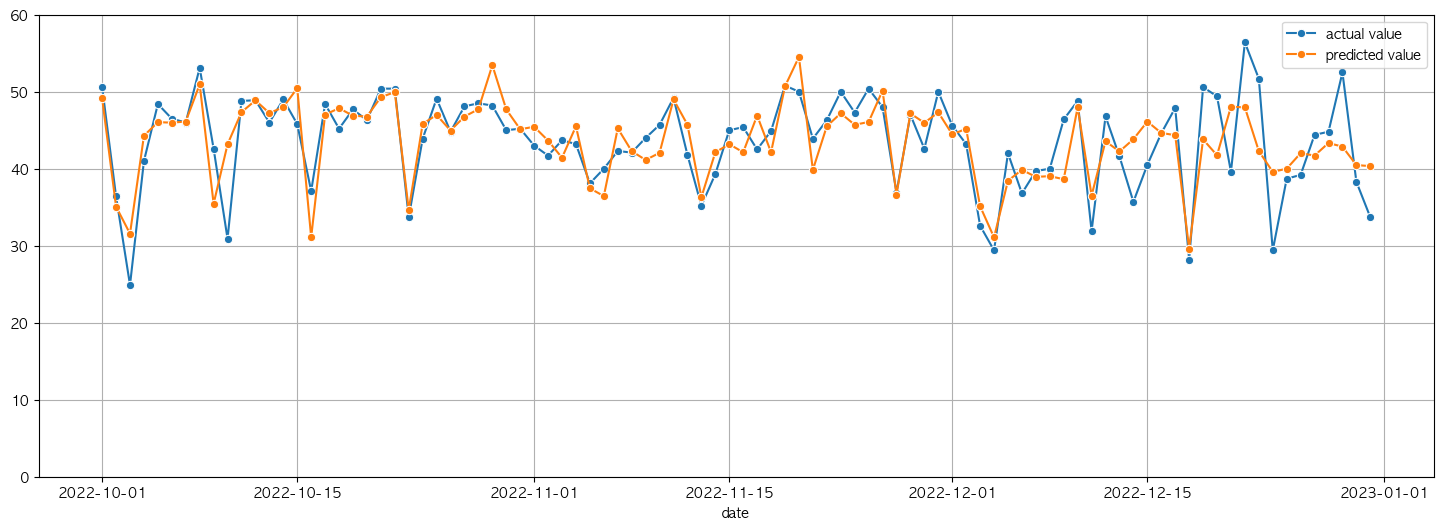

In [107]:
pred_plot(y_test, y_pred, test_date)

In [108]:
result['XGB mae'] = mean_absolute_error(y_test, y_pred)
result['XGB mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['XGB r2'] = r2_score(y_test, y_pred)

### 2-6. LightGBM

In [109]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(max_depth=5, random_state=1, verbose=-1)
model.fit(x_train, y_train)

LGBMRegressor(max_depth=5, random_state=1, verbose=-1)

In [110]:
y_pred = model.predict(x_test)

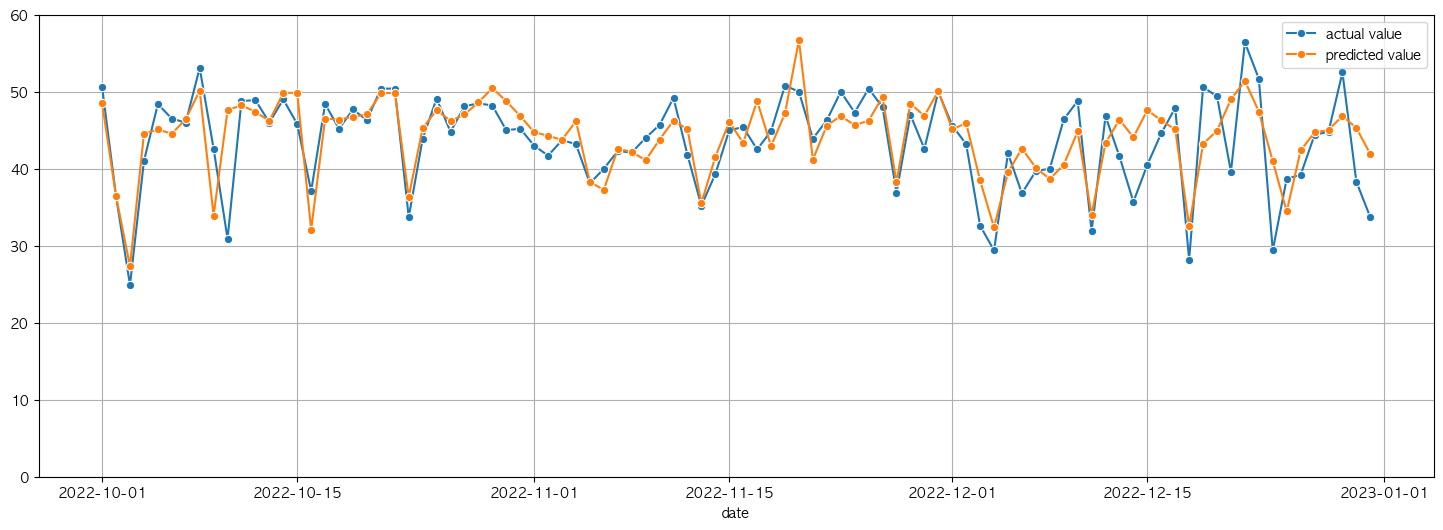

In [111]:
pred_plot(y_test, y_pred, test_date)

In [112]:
result['LGBM mae'] = mean_absolute_error(y_test, y_pred)
result['LGBM mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['LGBM r2'] = r2_score(y_test, y_pred)

### 2-7. SVR

In [113]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

SVR()

In [114]:
y_pred = model.predict(x_test)

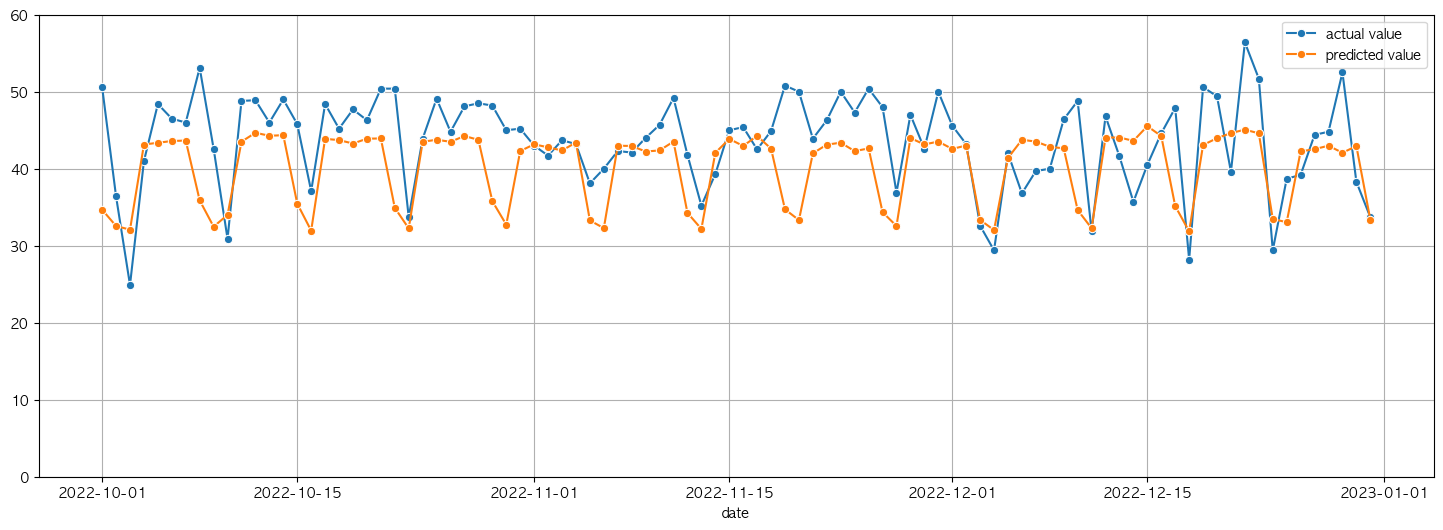

In [115]:
pred_plot(y_test, y_pred, test_date)

In [116]:
result['SVR mae'] = mean_absolute_error(y_test, y_pred)
result['SVR mape'] = mean_absolute_percentage_error(y_test, y_pred)
result['SVR r2'] = r2_score(y_test, y_pred)

### 2-8. 각 모델별 성능

In [117]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

선형회귀 mae 3.45
선형회귀 mape 0.089
선형회귀 r2 0.439
KNN mae 5.707
KNN mape 0.133
KNN r2 -0.393
Decision Tree mae 4.908
Decision Tree mape 0.116
Decision Tree r2 -0.152
Random Forest mae 3.333
Random Forest mape 0.083
Random Forest r2 0.475
XGB mae 2.966
XGB mape 0.072
XGB r2 0.576
LGBM mae 3.047
LGBM mape 0.075
LGBM r2 0.542
SVR mae 4.964
SVR mape 0.111
SVR r2 -0.14


상관계수를 고려하여 컬럼을 선정하고 모델링을 진행한 결과는 모든 컬럼을 고려한 모델 평가와 크게 다르지 않음을 확인하였다.

그럼에도 불구하고 변수를 선정하는 것이 조금이라도 더 좋은 결과를 보이는 것을 확인할 수는 있었다.(XGB 모델 평가)

# 3. 최종 분석 결과

장애인 콜택시의 대기 시간 예측은 기후 데이터의 영향을 크게 받지 않는다는 것을 확인할 수 있었다.